## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.675785  1.626797 -0.248753  1.435229  1.633731  1.554171
1 -0.934978  1.616836  0.960109 -0.902709 -0.950922 -0.692193
2 -1.389973  1.291017 -0.830563 -0.790872  0.570556 -0.801301
3 -1.631793 -1.351448  0.467626  0.941106  1.548427 -0.327242
4 -1.801830 -0.623943  1.536143 -0.221573 -0.601381 -0.977846


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0116540	total: 69.5ms	remaining: 1m 9s
1:	learn: 1.0010807	total: 70.1ms	remaining: 35s
2:	learn: 0.9893990	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9778270	total: 71.3ms	remaining: 17.7s
4:	learn: 0.9669634	total: 71.9ms	remaining: 14.3s
5:	learn: 0.9562862	total: 72.3ms	remaining: 12s
6:	learn: 0.9456536	total: 72.8ms	remaining: 10.3s
7:	learn: 0.9345024	total: 73.3ms	remaining: 9.09s
8:	learn: 0.9256775	total: 73.9ms	remaining: 8.14s
9:	learn: 0.9161334	total: 74.5ms	remaining: 7.37s
10:	learn: 0.9068746	total: 75ms	remaining: 6.75s
11:	learn: 0.8981795	total: 75.5ms	remaining: 6.22s
12:	learn: 0.8877888	total: 76ms	remaining: 5.77s
13:	learn: 0.8792218	total: 76.5ms	remaining: 5.38s
14:	learn: 0.8713438	total: 77ms	remaining: 5.05s
15:	learn: 0.8625807	total: 77.4ms	remaining: 4.76s
16:	learn: 0.8530358	total: 77.9ms	remaining: 4.5s
17:	learn: 0.8446879	total: 78.3ms	remaining: 4.27s
18:	learn: 0.8353125	total: 78.8ms	remaining: 4.07s
19:

88:	learn: 0.4268365	total: 110ms	remaining: 1.12s
89:	learn: 0.4230826	total: 110ms	remaining: 1.12s
90:	learn: 0.4185216	total: 111ms	remaining: 1.11s
91:	learn: 0.4148842	total: 111ms	remaining: 1.1s
92:	learn: 0.4110508	total: 112ms	remaining: 1.09s
93:	learn: 0.4070348	total: 112ms	remaining: 1.08s
94:	learn: 0.4030350	total: 113ms	remaining: 1.07s
95:	learn: 0.3993138	total: 113ms	remaining: 1.07s
96:	learn: 0.3962570	total: 114ms	remaining: 1.06s
97:	learn: 0.3930332	total: 114ms	remaining: 1.05s
98:	learn: 0.3886094	total: 115ms	remaining: 1.05s
99:	learn: 0.3849231	total: 116ms	remaining: 1.04s
100:	learn: 0.3821736	total: 116ms	remaining: 1.03s
101:	learn: 0.3786452	total: 116ms	remaining: 1.02s
102:	learn: 0.3753775	total: 117ms	remaining: 1.02s
103:	learn: 0.3721642	total: 117ms	remaining: 1.01s
104:	learn: 0.3694202	total: 118ms	remaining: 1s
105:	learn: 0.3662247	total: 118ms	remaining: 997ms
106:	learn: 0.3633428	total: 119ms	remaining: 990ms
107:	learn: 0.3600850	total:

258:	learn: 0.1231059	total: 187ms	remaining: 536ms
259:	learn: 0.1225010	total: 188ms	remaining: 535ms
260:	learn: 0.1218018	total: 188ms	remaining: 533ms
261:	learn: 0.1210630	total: 189ms	remaining: 532ms
262:	learn: 0.1204571	total: 189ms	remaining: 530ms
263:	learn: 0.1199034	total: 190ms	remaining: 529ms
264:	learn: 0.1190047	total: 190ms	remaining: 528ms
265:	learn: 0.1183944	total: 191ms	remaining: 527ms
266:	learn: 0.1176918	total: 191ms	remaining: 525ms
267:	learn: 0.1169603	total: 192ms	remaining: 524ms
268:	learn: 0.1163128	total: 192ms	remaining: 522ms
269:	learn: 0.1158023	total: 193ms	remaining: 521ms
270:	learn: 0.1152329	total: 193ms	remaining: 520ms
271:	learn: 0.1145902	total: 194ms	remaining: 519ms
272:	learn: 0.1137858	total: 194ms	remaining: 517ms
273:	learn: 0.1130886	total: 195ms	remaining: 516ms
274:	learn: 0.1125011	total: 195ms	remaining: 514ms
275:	learn: 0.1118596	total: 196ms	remaining: 513ms
276:	learn: 0.1111819	total: 196ms	remaining: 512ms
277:	learn: 

484:	learn: 0.0445709	total: 294ms	remaining: 312ms
485:	learn: 0.0445231	total: 294ms	remaining: 311ms
486:	learn: 0.0443132	total: 295ms	remaining: 310ms
487:	learn: 0.0440742	total: 295ms	remaining: 309ms
488:	learn: 0.0438690	total: 295ms	remaining: 309ms
489:	learn: 0.0436698	total: 296ms	remaining: 308ms
490:	learn: 0.0435222	total: 296ms	remaining: 307ms
491:	learn: 0.0433006	total: 297ms	remaining: 306ms
492:	learn: 0.0431553	total: 297ms	remaining: 306ms
493:	learn: 0.0429264	total: 298ms	remaining: 305ms
494:	learn: 0.0426846	total: 298ms	remaining: 304ms
495:	learn: 0.0424921	total: 299ms	remaining: 303ms
496:	learn: 0.0423280	total: 299ms	remaining: 303ms
497:	learn: 0.0421682	total: 300ms	remaining: 302ms
498:	learn: 0.0421237	total: 300ms	remaining: 301ms
499:	learn: 0.0419396	total: 300ms	remaining: 300ms
500:	learn: 0.0418961	total: 301ms	remaining: 300ms
501:	learn: 0.0416882	total: 301ms	remaining: 299ms
502:	learn: 0.0415056	total: 302ms	remaining: 298ms
503:	learn: 

644:	learn: 0.0233931	total: 372ms	remaining: 205ms
645:	learn: 0.0233648	total: 372ms	remaining: 204ms
646:	learn: 0.0232585	total: 373ms	remaining: 203ms
647:	learn: 0.0231436	total: 373ms	remaining: 203ms
648:	learn: 0.0230238	total: 374ms	remaining: 202ms
649:	learn: 0.0229060	total: 374ms	remaining: 201ms
650:	learn: 0.0227983	total: 375ms	remaining: 201ms
651:	learn: 0.0226931	total: 375ms	remaining: 200ms
652:	learn: 0.0226587	total: 376ms	remaining: 200ms
653:	learn: 0.0225775	total: 376ms	remaining: 199ms
654:	learn: 0.0224721	total: 376ms	remaining: 198ms
655:	learn: 0.0223697	total: 377ms	remaining: 198ms
656:	learn: 0.0223429	total: 377ms	remaining: 197ms
657:	learn: 0.0222657	total: 378ms	remaining: 196ms
658:	learn: 0.0221967	total: 378ms	remaining: 196ms
659:	learn: 0.0220876	total: 379ms	remaining: 195ms
660:	learn: 0.0219819	total: 379ms	remaining: 194ms
661:	learn: 0.0219143	total: 380ms	remaining: 194ms
662:	learn: 0.0218162	total: 380ms	remaining: 193ms
663:	learn: 

870:	learn: 0.0114872	total: 478ms	remaining: 70.8ms
871:	learn: 0.0114408	total: 478ms	remaining: 70.2ms
872:	learn: 0.0113897	total: 479ms	remaining: 69.7ms
873:	learn: 0.0113447	total: 479ms	remaining: 69.1ms
874:	learn: 0.0113324	total: 480ms	remaining: 68.5ms
875:	learn: 0.0112827	total: 480ms	remaining: 68ms
876:	learn: 0.0112728	total: 481ms	remaining: 67.5ms
877:	learn: 0.0112631	total: 481ms	remaining: 66.9ms
878:	learn: 0.0112009	total: 482ms	remaining: 66.3ms
879:	learn: 0.0111746	total: 482ms	remaining: 65.8ms
880:	learn: 0.0111261	total: 483ms	remaining: 65.2ms
881:	learn: 0.0110625	total: 483ms	remaining: 64.7ms
882:	learn: 0.0110505	total: 484ms	remaining: 64.1ms
883:	learn: 0.0110249	total: 484ms	remaining: 63.5ms
884:	learn: 0.0109664	total: 485ms	remaining: 63ms
885:	learn: 0.0109444	total: 485ms	remaining: 62.4ms
886:	learn: 0.0109230	total: 485ms	remaining: 61.9ms
887:	learn: 0.0109137	total: 486ms	remaining: 61.3ms
888:	learn: 0.0109045	total: 486ms	remaining: 60.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

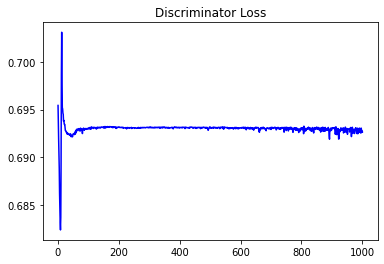

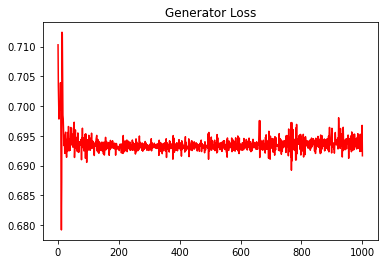

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.108007325562853


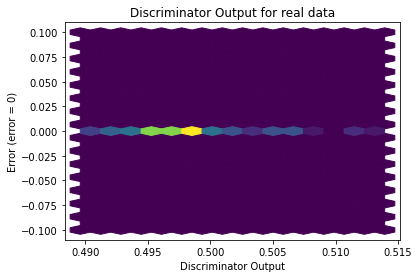

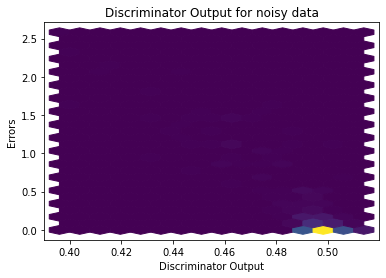

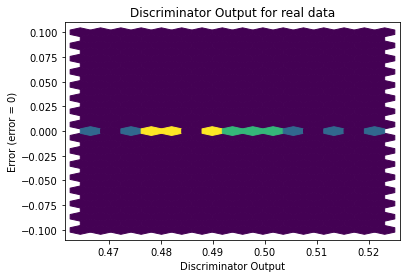

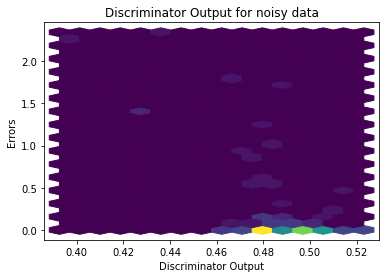

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


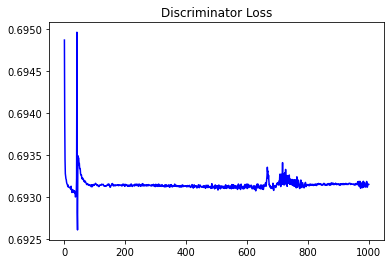

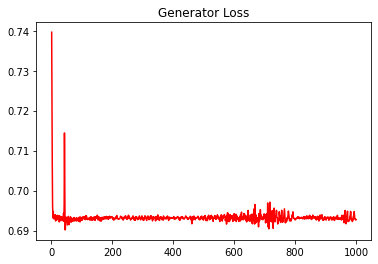

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1200084603846155


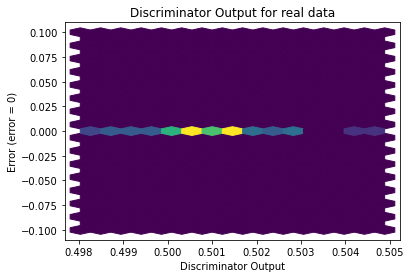

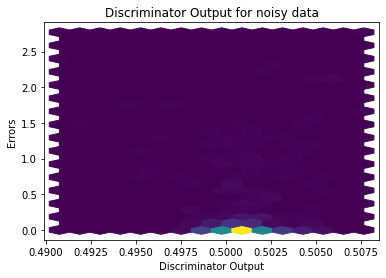

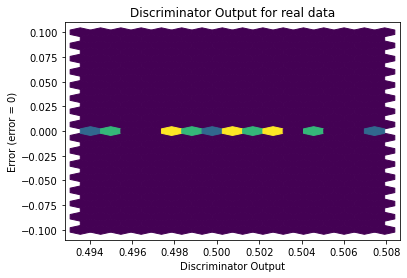

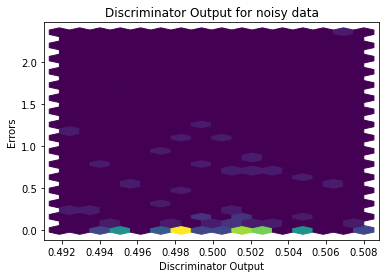

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0121]], requires_grad=True)
